In [83]:
import pandas as pd
import numpy as np
from scipy.stats import linregress


#Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Create a file path
filepath = "mxmh_survey_results.csv"

# Read in the data.
survey_results = pd.read_csv(filepath)
survey_results.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [5]:
survey_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [6]:
# Replace all column names
survey_results = survey_results.rename(columns={
    'Timestamp': 'timestamp',
    'Age': 'age',
    'Primary streaming service': 'streaming_service',
    'Hours per day': 'hours_per_day',
    'While working': 'while_working',
    'Instrumentalist': 'instrumentalist',
    'Composer': 'composer',
    'Fav genre': 'fav_genre',
    'Exploratory': 'exploratory',
    'Foreign languages': 'foreign_language',
    'BPM': 'bpm',
    'Frequency [Classical]': 'freq_classical',
    'Frequency [Country]': 'freq_country',
    'Frequency [EDM]': 'freq_edm',
    'Frequency [Folk]': 'freq_folk',
    'Frequency [Gospel]': 'freq_gospel',
    'Frequency [Hip hop]': 'freq_hiphop',
    'Frequency [Jazz]': 'freq_jazz',
    'Frequency [K pop]': 'freq_kpop',
    'Frequency [Latin]': 'freq_latin',
    'Frequency [Lofi]': 'freq_lofi',
    'Frequency [Metal]': 'freq_metal',
    'Frequency [Pop]': 'freq_pop',
    'Frequency [R&B]': 'freq_rnb',
    'Frequency [Rap]': 'freq_rap',
    'Frequency [Rock]': 'freq_rock',
    'Frequency [Video game music]': 'freq_video_game',
    'Anxiety': 'anxiety',
    'Depression': 'depression',
    'Insomnia': 'insomnia',
    'OCD': 'ocd',
    'Music effects': 'music_effects',
    'Permissions': 'permissions'
})
survey_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          736 non-null    object 
 1   age                735 non-null    float64
 2   streaming_service  735 non-null    object 
 3   hours_per_day      736 non-null    float64
 4   while_working      733 non-null    object 
 5   instrumentalist    732 non-null    object 
 6   composer           735 non-null    object 
 7   fav_genre          736 non-null    object 
 8   exploratory        736 non-null    object 
 9   foreign_language   732 non-null    object 
 10  bpm                629 non-null    float64
 11  freq_classical     736 non-null    object 
 12  freq_country       736 non-null    object 
 13  freq_edm           736 non-null    object 
 14  freq_folk          736 non-null    object 
 15  freq_gospel        736 non-null    object 
 16  freq_hiphop        736 non

In [7]:
survey_clean = survey_results.dropna()
survey_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 2 to 735
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          616 non-null    object 
 1   age                616 non-null    float64
 2   streaming_service  616 non-null    object 
 3   hours_per_day      616 non-null    float64
 4   while_working      616 non-null    object 
 5   instrumentalist    616 non-null    object 
 6   composer           616 non-null    object 
 7   fav_genre          616 non-null    object 
 8   exploratory        616 non-null    object 
 9   foreign_language   616 non-null    object 
 10  bpm                616 non-null    float64
 11  freq_classical     616 non-null    object 
 12  freq_country       616 non-null    object 
 13  freq_edm           616 non-null    object 
 14  freq_folk          616 non-null    object 
 15  freq_gospel        616 non-null    object 
 16  freq_hiphop        616 non-null

In [8]:
122/738

0.16531165311653118

In [10]:
survey_clean.composer.value_counts()

composer
No     508
Yes    108
Name: count, dtype: int64

In [17]:
survey_clean["composer"] = survey_clean.composer.apply(lambda x: True if x == "Yes" else False)
survey_clean["while_working"] = survey_clean.while_working.apply(lambda x: True if x == "Yes" else False)
survey_clean["instrumentalist"] = survey_clean.instrumentalist.apply(lambda x: True if x == "Yes" else False)
survey_clean["exploratory"] = survey_clean.exploratory.apply(lambda x: True if x == "Yes" else False)
survey_clean["foreign_language"] = survey_clean.foreign_language.apply(lambda x: True if x == "Yes" else False)
survey_clean.head()


/var/folders/px/4vvy8xt55rb5df8b2x6yw4zw0000gp/T/ipykernel_10247/1473642194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean["composer"] = survey_clean.composer.apply(lambda x: True if x == "Yes" else False)
/var/folders/px/4vvy8xt55rb5df8b2x6yw4zw0000gp/T/ipykernel_10247/1473642194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean["while_working"] = survey_clean.while_working.apply(lambda x: True if x == "Yes" else False)
/var/folders/px/4vvy8xt55rb5df8b2x6yw4zw0000gp/T/ipyke

,timestamp,age,streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_language,...,freq_rnb,freq_rap,freq_rock,freq_video_game,anxiety,depression,insomnia,ocd,music_effects,permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,False,False,False,Video game music,False,True,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,True,False,True,Jazz,True,True,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,True,False,False,R&B,True,False,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,True,True,True,Jazz,True,True,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,True,True,False,Video game music,True,True,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [19]:
survey_clean['timestamp'] = pd.to_datetime(survey_clean['timestamp'])
survey_clean.head()

/var/folders/px/4vvy8xt55rb5df8b2x6yw4zw0000gp/T/ipykernel_10247/2218098501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean['timestamp'] = pd.to_datetime(survey_clean['timestamp'])


,timestamp,age,streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_language,...,freq_rnb,freq_rap,freq_rock,freq_video_game,anxiety,depression,insomnia,ocd,music_effects,permissions
2,2022-08-27 21:28:18,18.0,Spotify,4.0,False,False,False,Video game music,False,True,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,True,False,True,Jazz,True,True,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,True,False,False,R&B,True,False,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,2022-08-27 21:56:50,18.0,Spotify,5.0,True,True,True,Jazz,True,True,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,True,True,False,Video game music,True,True,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


Text(0, 0.5, '')

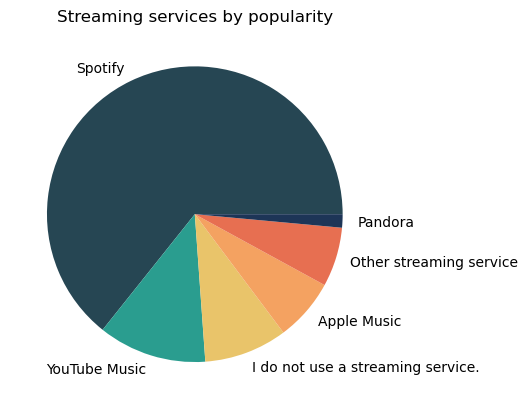

In [21]:
s_colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51', '#1D3557']

services = survey_clean.streaming_service.value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

/var/folders/px/4vvy8xt55rb5df8b2x6yw4zw0000gp/T/ipykernel_10247/1627338401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='Score', data=survey_long, palette = custom_palette )


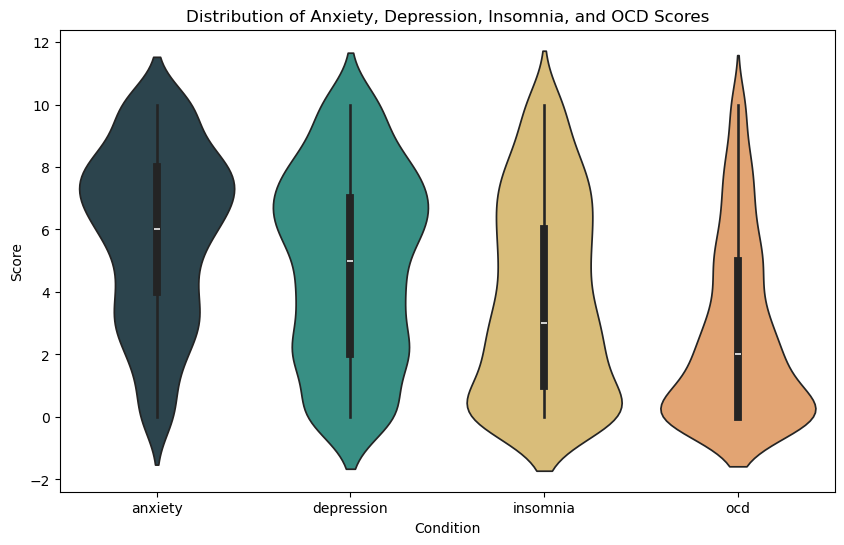

In [23]:
survey_long = survey_clean.melt(id_vars=[], value_vars=['anxiety', 'depression', 'insomnia', 'ocd'],
                                var_name='Condition', value_name='Score')
custom_palette = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261']
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='Score', data=survey_long, palette = custom_palette )
plt.title("Distribution of Anxiety, Depression, Insomnia, and OCD Scores")
plt.show()

<Axes: title={'center': 'Effects of Music on Mental Health'}>

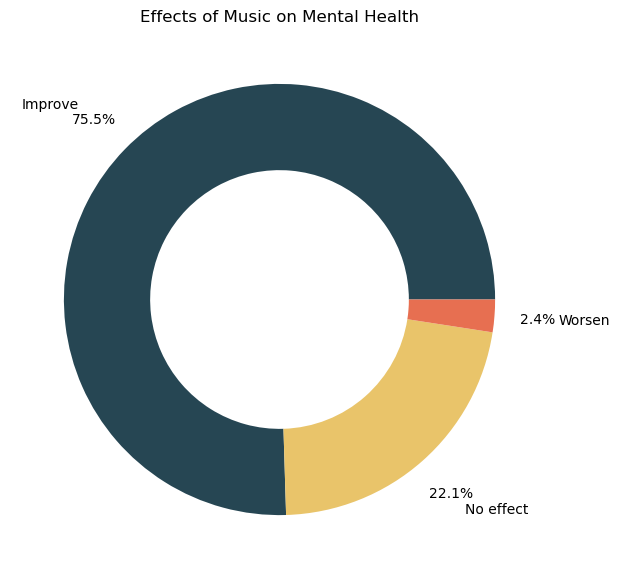

In [53]:
plt.figure(figsize=(10,7))
plt.title('Effects of Music on Mental Health')
p_colors = ['#264653', '#E9C46A', '#E76F51']
category_counts = survey_clean.music_effects.value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100
category_percentages.plot(kind='pie', ylabel='', colors = p_colors, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.3, wedgeprops={'width': 0.4})

/var/folders/px/4vvy8xt55rb5df8b2x6yw4zw0000gp/T/ipykernel_10247/4148741946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],


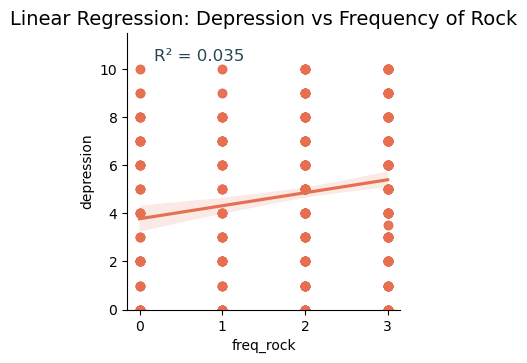

In [99]:
survey_clean.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
                        [0, 1, 2, 3], inplace=True)
fig = sns.lmplot(x ='freq_rock', y ='depression', data = survey_clean, height=3.5, scatter_kws={'color': '#E76F51'}, line_kws={'color': '#E76F51'})
fig.set(ylim=(0, 11.5))

# Calculate the R-squared value using linregress
slope, intercept, r_value, p_value, std_err = linregress(survey_clean['freq_rock'], survey_clean['depression'])
r_squared = r_value**2  # R-squared is the square of the correlation coefficient

# Annotate the R-squared value on the plot
plt.text(0.1, 0.9, f'R² = {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, color='#264653')

# Set title and show plot
plt.title('Linear Regression: Depression vs Frequency of Rock', fontsize=14)
plt.show()